## Introduction to Deep Learning 
# 
# Visualization
#
# Multilayer Perceptron with Keras - Dense Layer
### Build and visualize Simple feed forward dense network with Mnist data

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
#import utils_plot as uplot
import matplotlib.gridspec as gridspec
from sklearn.metrics import accuracy_score, log_loss
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline  

In [19]:
def drow_history(history, par='loss'):
    
    # list all data in history
    print(history.history.keys())
    # summarize history for loss
    plt.figure(figsize=(5,4))
    plt.ylim(0,1)
    plt.plot(history.history[par])
    plt.plot(history.history['val_'+par])
    plt.title('model '+par)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [20]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
# cb - cotrast_brightness
def show_n_images(imgs, cmap='gray', titles = None, enlarge = 4, mtitle=None,
                  cut = 0, axis_off = False, fontsize=40, cb = 1):
    
    plt.set_cmap(cmap);
    
    n = len(imgs);
    gs1 = gridspec.GridSpec(1, n);
    
    fig1 = plt.figure(figsize=(8*len(imgs),8)); 
    for i in range(n):

        ax1 = fig1.add_subplot(gs1[i]);
        if (cb):
            if len(np.unique(imgs[i])<=5):
                 img = imgs[i]
            else:
                
                img = cont_br(imgs[i])
        else:
            img = imgs[i]
        if cut:
            ax1.imshow(img[50:290, 75:450] , interpolation='none');
        else:
            
            ax1.imshow(img, interpolation='none');
        if (titles is not None):
            ax1.set_title(titles[i], fontsize=fontsize);  #, fontweight="bold");
        if (axis_off):
            plt.axis('off')
    if mtitle:
        plt.title(mtitle)
    plt.tight_layout()
    plt.show();

## Lets start Keras
In the Mnist classification example, we saw that the net basically learn templates.<br>
This is not robust enough for generalization. <br>
To generalize, we want the neural network to learn **features**. <br>
For that we will need deeper and more complexed networks.<br>
Lets build our first neural network with Keras.

We will use:

### Sequential Model
https://keras.io/models/sequential/

### Dense layer
https://keras.io/layers/core/

### Dropout layer
https://keras.io/layers/core/

### Optimizer Adam
https://keras.io/optimizers/

In [21]:
import keras
# Keras has many build in data sets
from keras.datasets import mnist
# Sequential is the basic feed forward neural network (FFN)
from keras.models import Sequential
# Dense is fully connected layer
# Dropout is a "noising" layer, to prevent over feet.
from keras.layers import Dense, Dropout
# Read about optimizers in keras documentation
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam

In [22]:
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score

## Mnist example

In [23]:
batch_size = 128
num_classes = 10


# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [24]:
from sklearn.preprocessing import LabelBinarizer
le = LabelBinarizer()

y_train = le.fit(y_train).transform(y_train)
y_test = le.transform(y_test)
y_test.shape

(10000, 10)

### Create the model
In previous chapter,I used the word network,in practical world, it called model.<br>
Model is from keras examples: https://github.com/keras-team/keras/blob/master/examples/mnist_mlp.py

In [25]:

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [26]:
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=4,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/4
469/469 [==============================] - 3s 6ms/step - loss: 0.2174 - accuracy: 0.9342 - val_loss: 0.1021 - val_accuracy: 0.9673
Epoch 2/4
469/469 [==============================] - 3s 6ms/step - loss: 0.0814 - accuracy: 0.9753 - val_loss: 0.0835 - val_accuracy: 0.9740
Epoch 3/4
469/469 [==============================] - 2s 5ms/step - loss: 0.0502 - accuracy: 0.9839 - val_loss: 0.1078 - val_accuracy: 0.9661
Epoch 4/4
469/469 [==============================] - 2s 5ms/step - loss: 0.0368 - accuracy: 0.9883 - val_loss: 0.0665 - val_accuracy: 0.9799
Test loss: 0.06650950014591217
Test accuracy: 0.9799000024795532


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


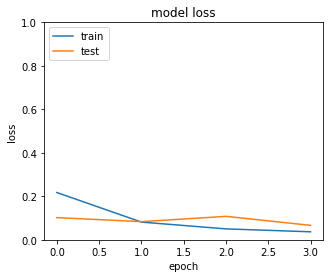

In [27]:
drow_history(history, 'loss')

In [50]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09009279310703278
Test accuracy: 0.9697999954223633


# Visualize Model layers
While training the model, lets view the layers, meaning the incoming weights, to each neuron in the layer. Lets train for 2 epoch's, and examine the results. 

In [67]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=4,
                    verbose=1,
                    validation_data=(x_test, y_test))

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_22 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_23 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4
469/469 [==============================] - 3s 6ms/step - loss: 0.2189 - accuracy: 0.9359 - val_loss: 0.1013 - val_accuracy: 0.9699
Epoch 2/4
469/469 [==============================] - 2s 5ms/step - loss: 0.0801 - accuracy: 0.9752 - val_loss: 0.0818 - val_accuracy: 0.9745
Epoch 3/4
469/469 [==============================] - 3s 5ms/step - loss: 0.0503 - accuracy: 0.98

### First Hidden Layer
First layer is a dense layer of size 512, meaning that each input pixel intensity, from the 764 inputs, is connected to each neuron in the hidden layer.<br>
So we get $784*512$ incoming weights to the first hidden layer. Lets look at them:

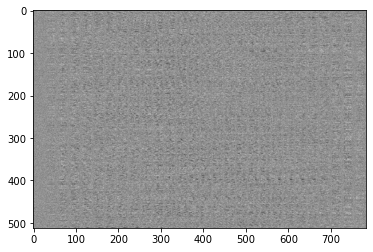

In [68]:
W0 = model.get_layer(name=model.layers[0].name).get_weights()[0]
W0a=W0.reshape((784,512)).copy()
plt.imshow(W0a.T);
plt.set_cmap('gray')

Each row in the above matrix,is multiplication by the input layer pixels intensities,or the input vector, and produce $512$ input vector to the next layer.<br>
To demonstrate the weights, we will reshape each row(of 784 weights) back to the (28,28) original shape, so we can see what patterns are causing activation.

<Figure size 432x288 with 0 Axes>

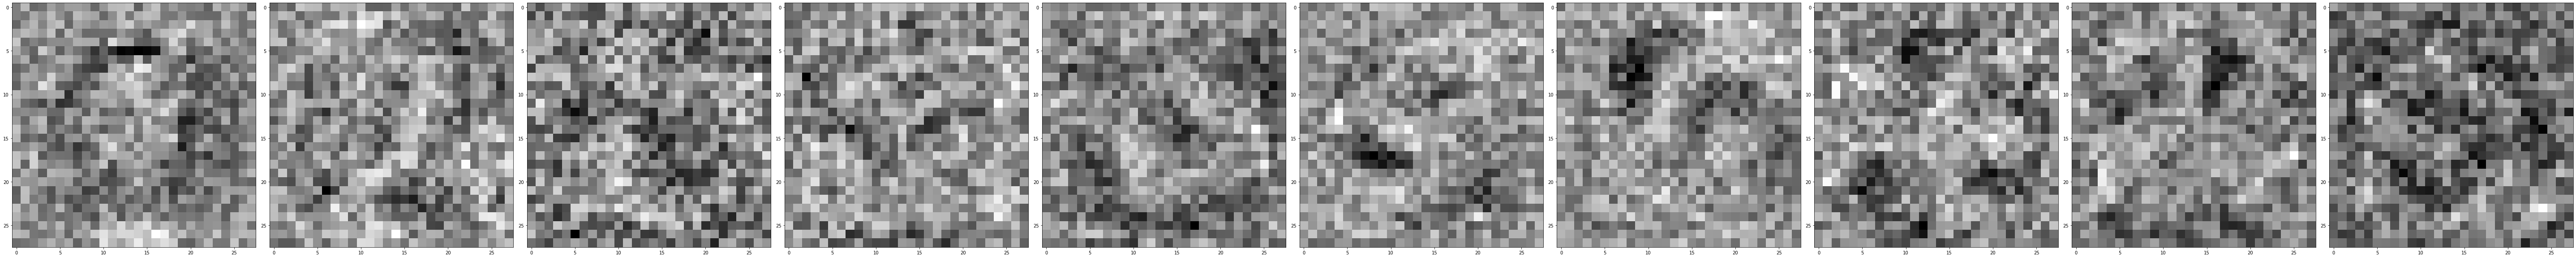

In [69]:

dense_list0 = [W0a.T[i, :].reshape(28,28) for i in range(10)]
show_n_images(dense_list0)

### Activation Example of the First Hidden Layer
Lets check the network "response" or activation, to one of the digit images from the test set, and follow the weighs and activation flow down to the last output layer.<br>
To do that, we multiply $W^T*X$,where $X$ is an input image. <br>
The image:

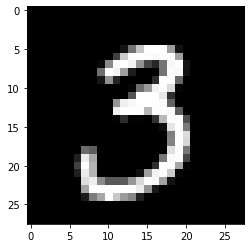

In [70]:
W70=W0a.T*x_test[90]
plt.imshow(x_test[90].reshape(28,28))

Lets view the activation of the image, the result of the multiplication above.

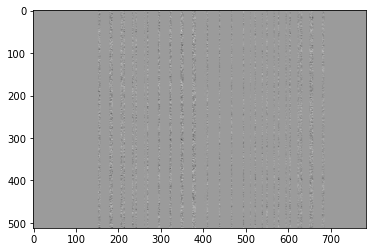

In [71]:
plt.imshow(W70)

Again,to understand the activation patterns,we reshape them back to the(28,28) original shape.

<Figure size 432x288 with 0 Axes>

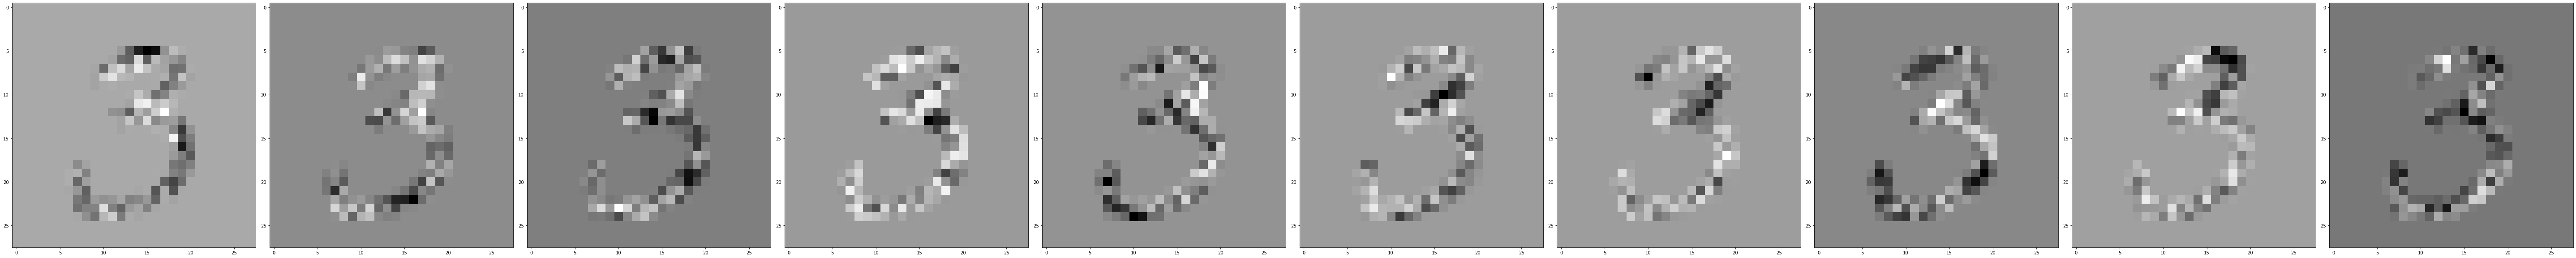

In [72]:
dense_list70 = [W70[i, :].reshape(28,28) for i in range(10)]
show_n_images(dense_list70)

### Second hodden layer

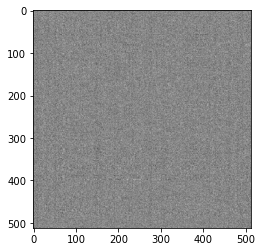

In [73]:
W1 = model.get_layer(name=model.layers[1].name).get_weights()[0]
Wa1=W1.reshape((512,512)).copy()
plt.imshow(Wa1)

<Figure size 432x288 with 0 Axes>

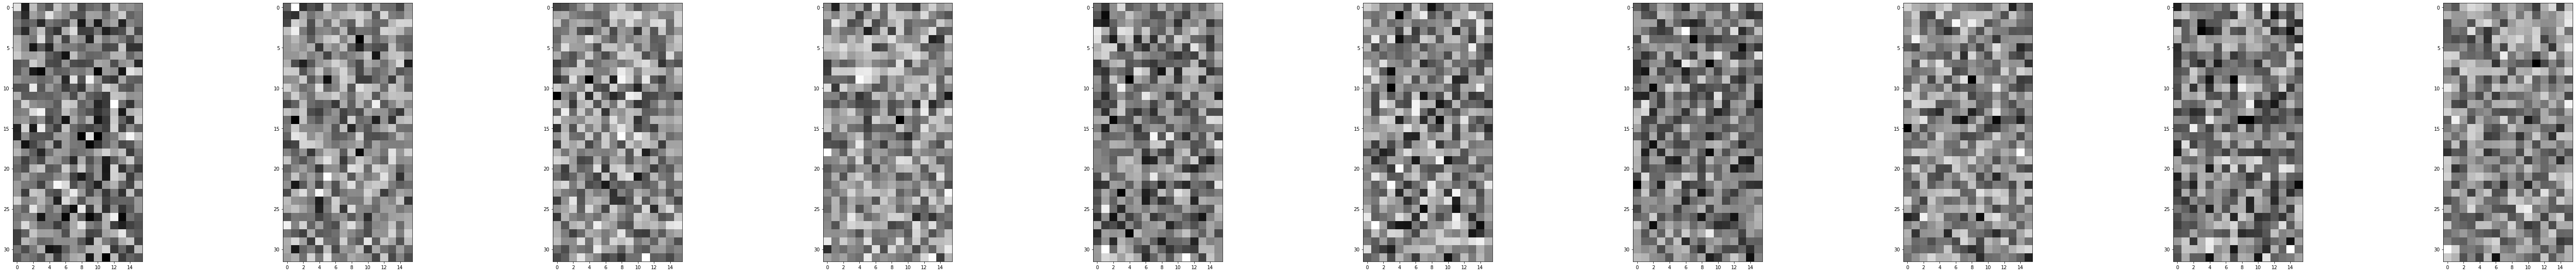

In [74]:
dense_list1= [Wa1[i,:].reshape(32,16) for i in range(10)]
show_n_images(dense_list1)


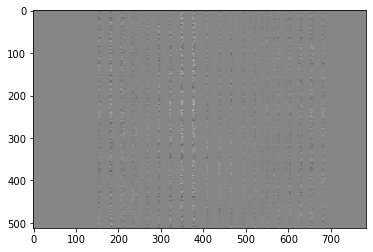

In [75]:
W17 = np.dot((Wa1.T),W70)
plt.imshow(W17)

<Figure size 432x288 with 0 Axes>

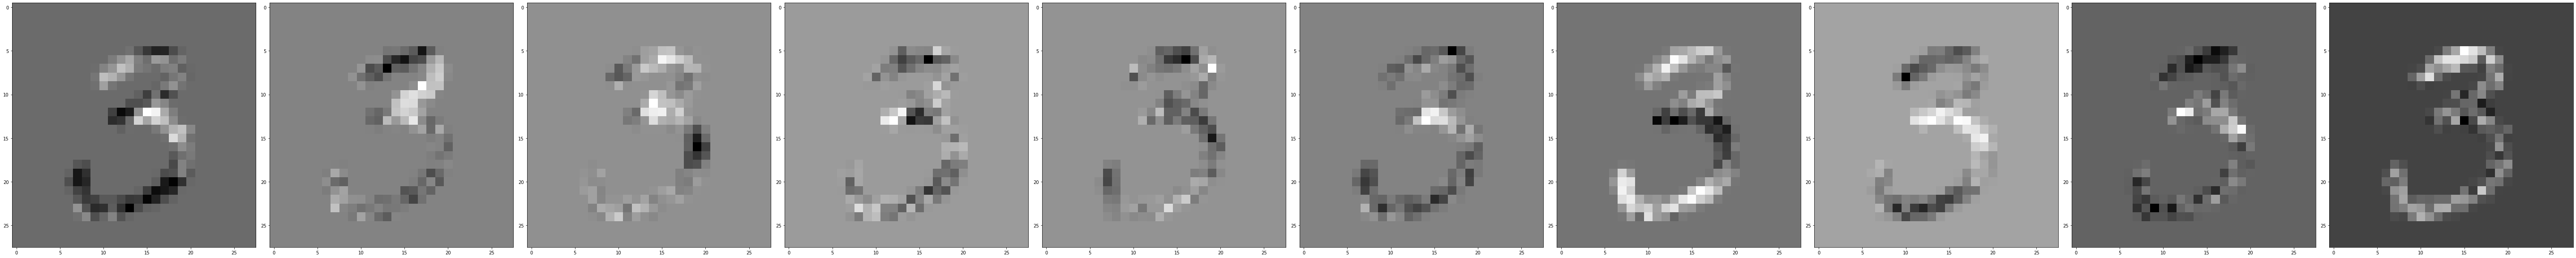

In [76]:
dense_list17= [W17[i,:].reshape(28,28) for i in range(10)]
show_n_images(dense_list17)

### Last Dense Layer
Last dense layer size is 10, as the number of classes. Following is a view of this Layer, as a matrix, and with each row resized to a rectangle.

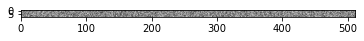

In [77]:
W2 = model.get_layer(name=model.layers[2].name).get_weights()[0]
W2a=W2.reshape((10,512)).copy()
plt.imshow(W2a)

<Figure size 432x288 with 0 Axes>

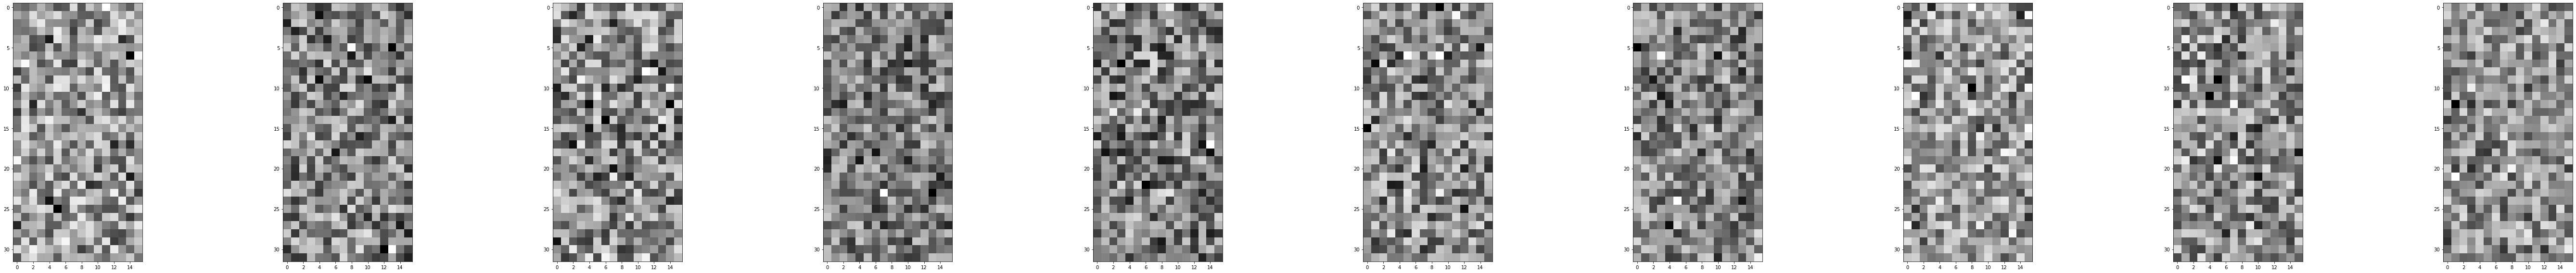

In [78]:

dense_list2= [W2a[i, :].reshape(32,16) for i in range(10)]
show_n_images(dense_list2)

Hard to see any patterns in this layer visualization. 

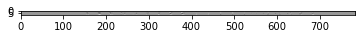

In [79]:
W27=np.dot(W2.T,W17)
plt.imshow(W27)

<Figure size 432x288 with 0 Axes>

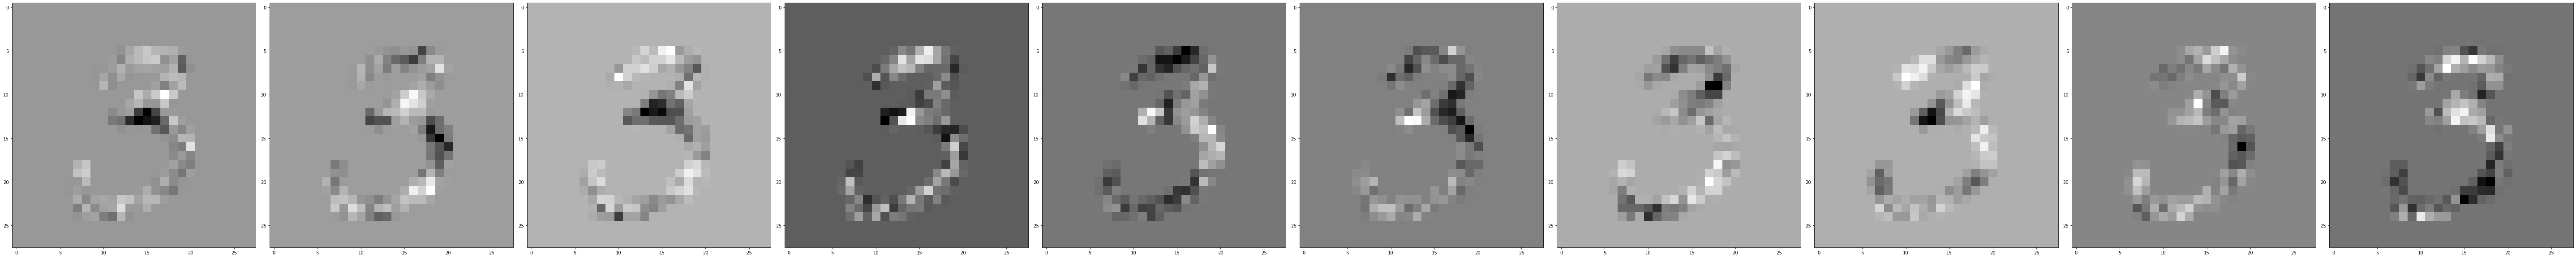

In [80]:
dense_list27= [W27[i, :].reshape(28,28) for i in range(10)]
show_n_images(dense_list27)

### Apply Softmax on the last hidden layer.
We can see from the weights image, that the "template" or row for the digit 3, is standing out in the activation row, and that is reflected in the numbers.

In [81]:

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0) # only difference


In [82]:
print([W27[i].sum() for i in range(10)])
x = [W27[i].sum() for i in range(10)]

pred = softmax(x)#np.exp(x)/np.sum(x)

for i in range(10):
    print("{0:.2f}".format(pred[i]), end=' ')

[4.3171024, -12.391281, -42.54796, 43.192223, -8.390995, -19.481857, -55.822113, -21.099525, 27.462807, 19.185263]
0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 

## Classification Exercise Fashion Mnist
https://keras.io/datasets/
Dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST. The class labels are:
```
* Label	Description
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot
```

Build the best model for this data

In [83]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [84]:
x_train[0].shape, x_train.shape,x_test.shape

((28, 28), (60000, 28, 28), (10000, 28, 28))

['lable 9', 'lable 0', 'lable 0', 'lable 3', 'lable 0', 'lable 2', 'lable 7', 'lable 2', 'lable 5', 'lable 5', 'lable 0', 'lable 9', 'lable 5', 'lable 5', 'lable 7', 'lable 9', 'lable 1', 'lable 0', 'lable 6', 'lable 4']


<Figure size 432x288 with 0 Axes>

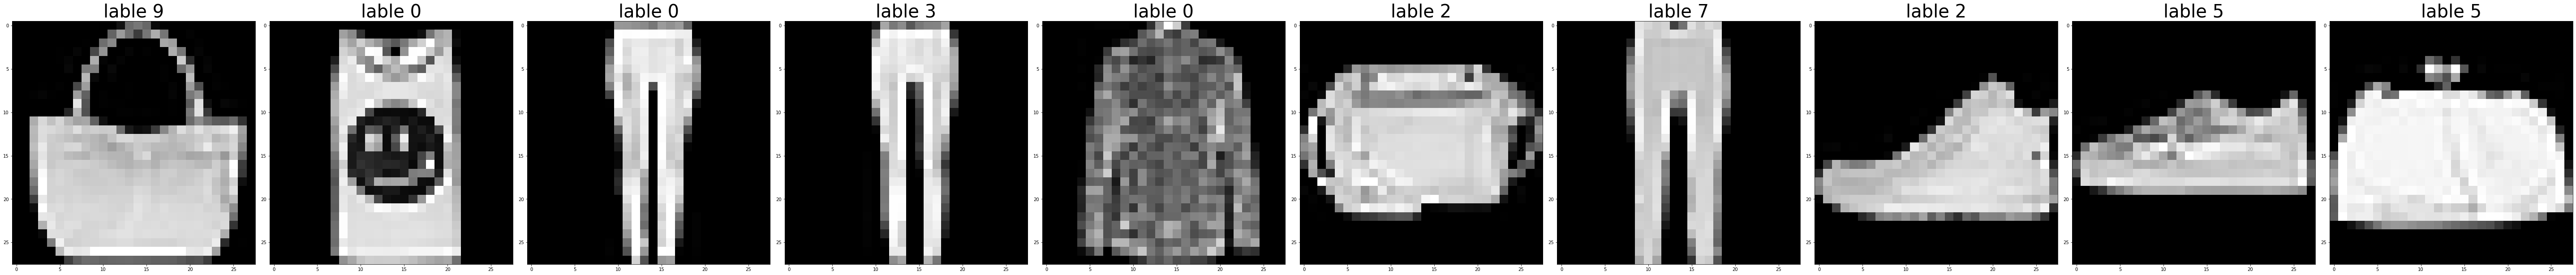

In [85]:
imgs = [x_train[i].reshape(28,28) for i in range(100,110)]
titles = [("lable {}").format(y_train[i]) for i in range(20)]
print(titles)
show_n_images(imgs, titles=titles)

In [86]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [87]:
from sklearn.preprocessing import LabelBinarizer
num_classes=10
le = LabelBinarizer()

y_train = le.fit(y_train).transform(y_train)
y_test = le.transform(y_test)
y_test.shape

(10000, 10)

In [88]:
## model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=2,
                    verbose=1,
                    validation_data=(x_test, y_test))

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_22 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_23 (Dense)             (None, 10)                5130      
_________________________________________________________________
dense_24 (Dense)             (None, 512)               5632      
_________________________________________________________________
dense_25 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_26 (Dense)             (None, 10)                5130      
Total params: 943,124
Trainable params: 943,124
Non-trainable params: 0
________________________________________________

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


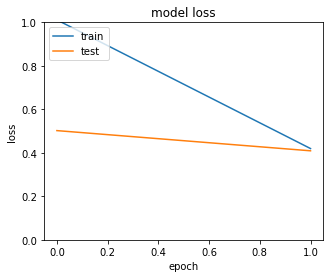

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


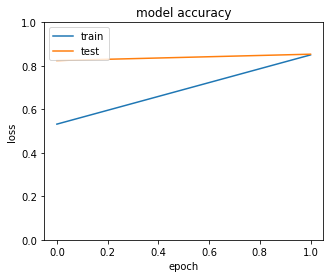

In [90]:
drow_history(history, 'loss')
drow_history(history, 'accuracy')

## Evaluate

In [91]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4092945158481598
Test accuracy: 0.853600025177002


## Predict

In [92]:
pred_test = model.predict(x_test)
pred_test[0:5]

array([[1.2357342e-05, 1.0145005e-04, 7.1863840e-05, 4.6150148e-05,
        2.7198093e-05, 2.0681327e-02, 8.0056025e-06, 5.4682499e-01,
        1.9077031e-03, 4.3031898e-01],
       [1.0853126e-03, 4.3485445e-05, 9.8235798e-01, 1.9894067e-04,
        8.1256591e-03, 2.0268157e-05, 7.2991257e-03, 6.8995672e-05,
        7.9826982e-04, 1.9874724e-06],
       [1.1200455e-03, 9.9839056e-01, 1.4872539e-08, 4.5259760e-04,
        6.1165062e-10, 6.8977841e-09, 3.6843485e-05, 2.0621721e-11,
        2.8299070e-08, 9.0032343e-10],
       [1.1354522e-03, 9.9836355e-01, 1.5530462e-08, 4.6317719e-04,
        6.4287742e-10, 7.2360140e-09, 3.7746951e-05, 2.1995034e-11,
        2.9625896e-08, 9.4879471e-10],
       [1.0027370e-01, 1.9134879e-03, 1.2284215e-01, 9.7609153e-03,
        2.0619383e-02, 4.4970209e-05, 7.4020272e-01, 1.1795855e-05,
        4.3238373e-03, 7.0523711e-06]], dtype=float32)

In [93]:
y_pred_test=np.argmax(pred_test, axis=1)
y_pred_test[0:10], y_test[0:10]

(array([7, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64),
 array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]]))

We can see that the prediction are very accurate, but we can see as well that the network is limited in its ability to understand digits in different locations and orientations. <br>
Lets think about the following idea: We have an image, with a digit inside. if we can "move" our network around, and position it on the part containing the digit, in the right orientation, we can  classify the digit correctly. This is, in a very simplified form, the idea of **convolutional neural  networks**. They work with sets of filters, slided over the image, to capture specific features, without being bind to specific location.

### Learn more:
* https://keras.io/
* https://www.coursera.org/learn/neural-networks/lecture/kOQiH/why-object-recognition-is-difficult-5-min

### Articles:
* Zhe Li1, Boqing Gong, Tianbao Yang. **Improved Dropout for Shallow and Deep Learning**, 
The University of Iowa, Iowa city, IA 52245. University of Central Florida, Orlando, FL 32816. https://arxiv.org/pdf/1602.02220.pdf
* Nitish Srivastava,Geoffrey Hinton, Alex Krizhevsky, Ruslan Salakhutdinov, Ilya Sutskever. **Dropout: A Simple Way to Prevent Neural Networks from Overfitting**,  June 2014Journal of Machine Learning Research 15(1):1929-1958
* Ilya Sutskever, James Martens, George Dahl, Geoffrey Hinton. **On the importance of initialization and momentum in deep learning**.  ICML'13 Proceedings of the 30th International Conference on International Conference on Machine Learning - Volume 28 Pages III-1139-III-1147. Atlanta, GA, USA — June 16 - 21, 2013 http://proceedings.mlr.press/v28/sutskever13.pdf

